Welcome to the mobility notebook. This notebook does an in-depth analysis of the mobility of HPVs for carrying water. It uses the mobility_module.py package, this is where all of the models are stored.



In [31]:
import pandas as pd
import mobility_module as mm
import plotly.express as px

In [32]:
######################
#### Import Data #####
with open("../data/mobility-model-parameters.csv") as csv_file:
    # read the csv file
    allHPV_param_df = pd.read_csv("../data/mobility-model-parameters.csv")

mo = mm.model_options()

Below, choose which model to use, 1 = Sprott, 2 = Cycling, 3 = walking 

In [33]:
mo.model_selection = 2

Below, sets up which HPVs to include given the input model

In [34]:

####################
##### Options ######
####################

if mo.model_selection == 1:
    # sprott, include all
    filter_col = -1
    filter_value = 1

elif mo.model_selection == 2:
    # cycling:
    filter_col = 5
    filter_value = 1

if mo.model_selection > 2:
    # walking only
    filter_col = 6
    filter_value = 0



In [35]:

# selectHPVs you're interested in
if filter_col > 0:
    column_names = [
        "Name",
        "LoadLimit",
        "AverageSpeedWithoutLoad",
        "Drive",
        "GroundContact",
        "Pilot",
        "Crr",
        "Efficiency",
        "Weight",
    ]  # copied from
    col = column_names[filter_col]
    param_df = allHPV_param_df.loc[(allHPV_param_df[col] == filter_value)]
else:
    param_df = allHPV_param_df


In [36]:

# initialise variables, options, MET, hpv and results classes, populated with data via 'init' functions
mv = mm.model_variables()
met = mm.MET_values(mv)
hpv = mm.HPV_variables(param_df, mv)
mr = mm.model_results(hpv, mo)


In [37]:
####### SPROTT MODEL ########
if mo.model_selection == 1:
    mr.v_load_matrix3d, mr.load_matrix3d = mm.mobility_models.sprott_model(
        hpv, mv, mo, mr
    )

####### Numerical MODEL ########
elif mo.model_selection > 1:
    mr.v_load_matrix3d, mr.load_matrix3d = mm.mobility_models.numerical_mobility_model(
        mr, mv, mo, met, hpv
    )




In [38]:

####### Organise Results #######
mo.slope_scene = 0
mr.load_results(hpv, mv, mo)


In [39]:

# mr.velocitykgs



mm.plotting_hpv.load_plot_plotly(mr, mo, hpv)
mm.plotting_hpv.bar_plot_loading_distance(mr, mo, hpv, mv)
mm.plotting_hpv.slope_plot_plotly(mr, mo, hpv)



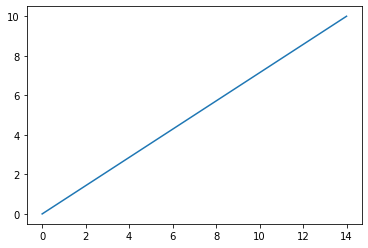

In [40]:
import matplotlib.pyplot as plt

plt.plot(mr.slope_matrix3d_deg[0,:,0])